In [1]:
# import necessary libraries

!pip install pandas
import pandas as pd    #for import/export,data structures,easy handling and cleaning data 
import numpy as np      # for numeric calculations,array,algebra 
import matplotlib.pyplot as plt  # 2d platting library for data visualisation 
import seaborn as sns     # for advance statistical visualisation like heatmaps,pair plots,violin plots
import plotly.express as px   #for 3d plots,line plots,scatter plots, maps  

In [2]:
# import data
df = pd.read_csv(r'D:\Nadia\Data Analysis\Python\Project_EDA\Datasets\heart_attack_dataset.csv')



In [3]:
import os                   # to know where my jupiter is installed as i am having issue in dataset to make it read
print(os.getcwd())

C:\Users\admin


In [4]:
df.info()                           # to check and overall data dynamics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 1000 non-null   object 
 1   Age                    1000 non-null   int64  
 2   Blood Pressure (mmHg)  1000 non-null   int64  
 3   Cholesterol (mg/dL)    1000 non-null   int64  
 4   Has Diabetes           1000 non-null   object 
 5   Smoking Status         1000 non-null   object 
 6   Chest Pain Type        1000 non-null   object 
 7   Treatment              1000 non-null   object 
 8   Unnamed: 8             0 non-null      float64
 9   Unnamed: 9             0 non-null      float64
dtypes: float64(2), int64(3), object(5)
memory usage: 78.2+ KB


In [5]:
df.head()                           # to check first 5 rows

,Gender,Age,Blood Pressure (mmHg),Cholesterol (mg/dL),Has Diabetes,Smoking Status,Chest Pain Type,Treatment,Unnamed: 8,Unnamed: 9
0,Male,70,181,262,No,Never,Typical Angina,Lifestyle Changes,NaN,NaN
1,Female,55,103,253,Yes,Never,Atypical Angina,Angioplasty,NaN,NaN
2,Male,42,95,295,Yes,Current,Typical Angina,Angioplasty,NaN,NaN
3,Male,84,106,270,No,Never,Atypical Angina,Coronary Artery Bypass Graft (CABG),NaN,NaN
4,Male,86,187,296,Yes,Current,Non-anginal Pain,Medication,NaN,NaN


In [6]:
print(df.columns.tolist())                    # to check the column names

['Gender', 'Age', 'Blood Pressure (mmHg)', 'Cholesterol (mg/dL)', 'Has Diabetes', 'Smoking Status', 'Chest Pain Type', 'Treatment', 'Unnamed: 8', 'Unnamed: 9']


In [7]:
df.columns = df.columns.str.strip()          # Strip whitespace from column names 

In [8]:
for col in df.columns:            # to know columns exact representation
    print(f"'{col}'")  

'Gender'
'Age'
'Blood Pressure (mmHg)'
'Cholesterol (mg/dL)'
'Has Diabetes'
'Smoking Status'
'Chest Pain Type'
'Treatment'
'Unnamed: 8'
'Unnamed: 9'


In [9]:
df_cleaned = df.drop(columns=['Unnamed: 8', 'Unnamed: 9'])    # Drop unnamed columns as it has no use 

In [10]:
df_cleaned.head()                 # to check first 5 rows of clean data 

,Gender,Age,Blood Pressure (mmHg),Cholesterol (mg/dL),Has Diabetes,Smoking Status,Chest Pain Type,Treatment
0,Male,70,181,262,No,Never,Typical Angina,Lifestyle Changes
1,Female,55,103,253,Yes,Never,Atypical Angina,Angioplasty
2,Male,42,95,295,Yes,Current,Typical Angina,Angioplasty
3,Male,84,106,270,No,Never,Atypical Angina,Coronary Artery Bypass Graft (CABG)
4,Male,86,187,296,Yes,Current,Non-anginal Pain,Medication


In [11]:
df_cleaned.tail()            # to know the last 5 rows of the filtered dataset

,Gender,Age,Blood Pressure (mmHg),Cholesterol (mg/dL),Has Diabetes,Smoking Status,Chest Pain Type,Treatment
995,Male,42,125,193,Yes,Current,Typical Angina,Angioplasty
996,Male,80,186,267,Yes,Never,Atypical Angina,Coronary Artery Bypass Graft (CABG)
997,Female,64,108,174,Yes,Current,Non-anginal Pain,Coronary Artery Bypass Graft (CABG)
998,Female,84,123,195,No,Current,Asymptomatic,Lifestyle Changes
999,Male,61,155,197,No,Former,Atypical Angina,Lifestyle Changes


In [12]:
df_cleaned.info()                  # to check data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Gender                 1000 non-null   object
 1   Age                    1000 non-null   int64 
 2   Blood Pressure (mmHg)  1000 non-null   int64 
 3   Cholesterol (mg/dL)    1000 non-null   int64 
 4   Has Diabetes           1000 non-null   object
 5   Smoking Status         1000 non-null   object
 6   Chest Pain Type        1000 non-null   object
 7   Treatment              1000 non-null   object
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [13]:
df_cleaned['Gender'].value_counts()     # Checking the unique values and gender wise count

Female    510
Male      490
Name: Gender, dtype: int64

In [14]:
df_cleaned['Has Diabetes'].value_counts()            # Checking how many are diabetic  

Yes    517
No     483
Name: Has Diabetes, dtype: int64

In [15]:
df_cleaned.describe()              # to understand the distribution of numeric columns

,Age,Blood Pressure (mmHg),Cholesterol (mg/dL)
count,1000.000000,1000.000000,1000.000000
mean,60.338000,145.440000,223.789000
std,17.317496,31.756525,42.787817
min,30.000000,90.000000,150.000000
25%,45.000000,118.000000,185.000000
50%,60.500000,146.000000,225.500000
75%,76.000000,173.000000,259.000000
max,89.000000,199.000000,299.000000


In [16]:
df_cleaned['Smoking Status'].value_counts()          # checking the smoking status of patients

Never      352
Current    325
Former     323
Name: Smoking Status, dtype: int64

In [17]:
df_cleaned['Chest Pain Type'].value_counts()          # checking the diagnosis of chest pain in total patients

Non-anginal Pain    261
Asymptomatic        255
Typical Angina      243
Atypical Angina     241
Name: Chest Pain Type, dtype: int64

In [18]:
df_cleaned['Treatment'].value_counts()       # checking the treatment/recommendation prescribed by doctor to patients 

Lifestyle Changes                      269
Coronary Artery Bypass Graft (CABG)    252
Angioplasty                            247
Medication                             232
Name: Treatment, dtype: int64

# Univariate Analysis
I did to see distribution and to see any outliers among them and the data is clean. To know the overall statistical figure. 

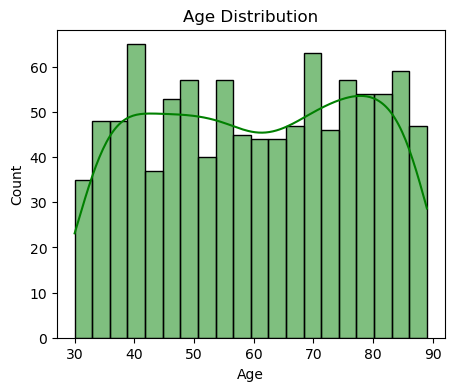

In [19]:
# Visualisation Analysis:
# AGE distribution Plot:
plt.figure(figsize=(5,4))
sns.histplot(df_cleaned['Age'], bins=20, kde=True, color='green')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

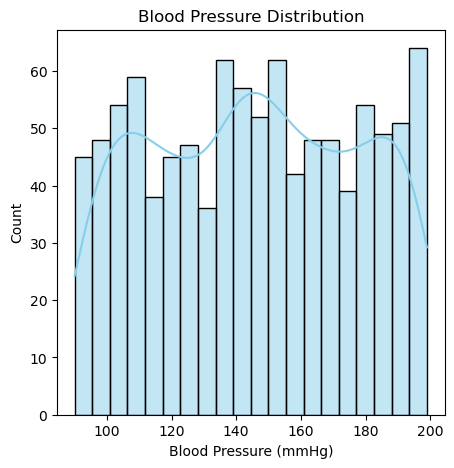

In [20]:
# Blood Pressure distribution analysis:
plt.figure(figsize=(5,5))
sns.histplot(df_cleaned['Blood Pressure (mmHg)'], bins=20, kde=True, color='skyblue')
plt.title('Blood Pressure Distribution')
plt.xlabel('Blood Pressure (mmHg)')
plt.ylabel('Count')
plt.show()

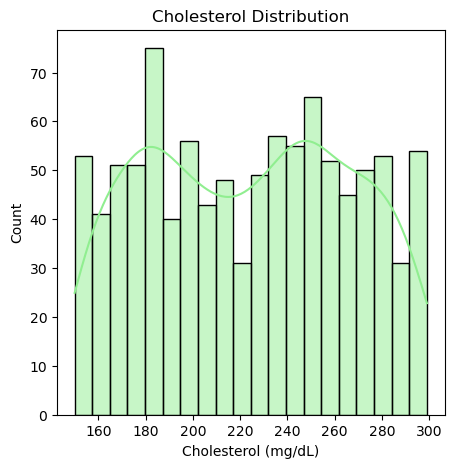

In [21]:
# Cholesterol distribution analysis:
plt.figure(figsize=(5,5))
sns.histplot(df_cleaned['Cholesterol (mg/dL)'], bins=20, kde=True, color='lightgreen')
plt.title('Cholesterol Distribution')
plt.xlabel('Cholesterol (mg/dL)')
plt.ylabel('Count')
plt.show()

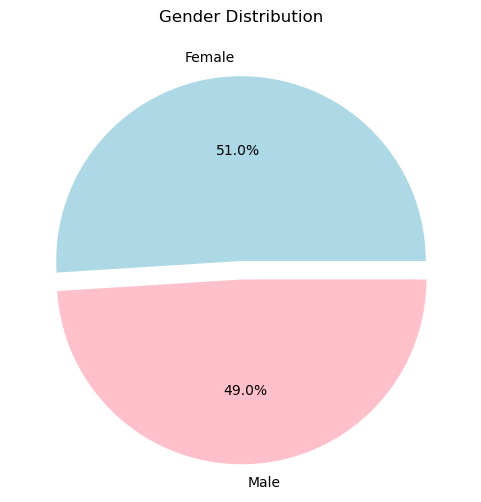

In [22]:
# Gender distribution plot
plt.figure(figsize=(6,6))
df_cleaned['Gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'pink'], explode=[0,0.1])
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

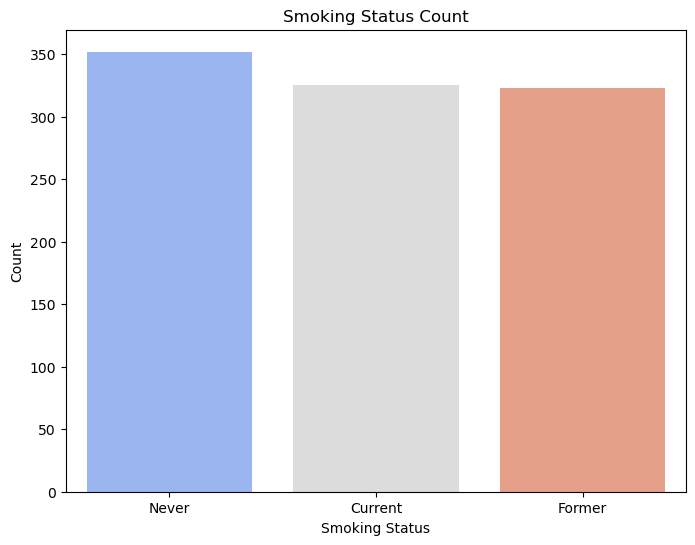

In [76]:
# Smoking Status Distribution
plt.figure(figsize=(8,6))
sns.countplot(x = 'Smoking Status', data=df_cleaned, palette='coolwarm')  
plt.title('Smoking Status Count') 
plt.xlabel('Smoking Status') 
plt.ylabel('Count')   
plt.show()           

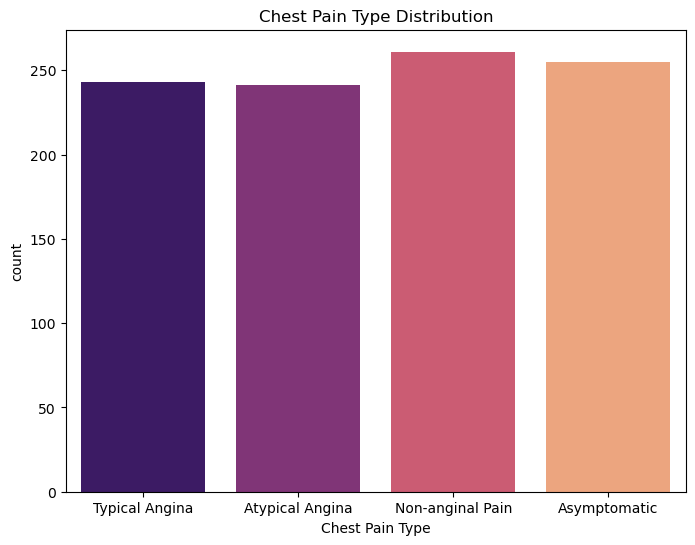

In [77]:
# chest pain types plot
plt.figure(figsize=(8,6))
sns.countplot(x='Chest Pain Type', data=df_cleaned, palette='magma')
plt.title('Chest Pain Type Distribution')
plt.show()

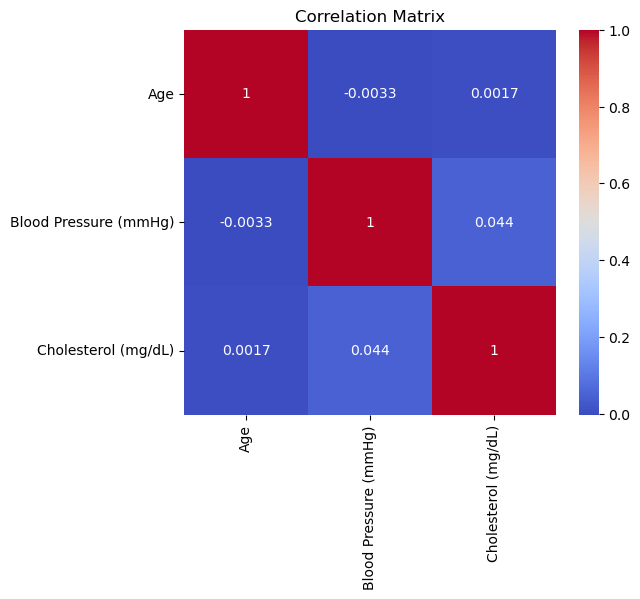

In [78]:
# Correlation matrix b/w Bp & Cholesterol
plt.figure(figsize=(6,5))
sns.heatmap(df_cleaned[['Age', 'Blood Pressure (mmHg)', 'Cholesterol (mg/dL)']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [144]:
df_cleaned=pd.DataFrame(df_cleaned)

In [146]:
# Group by Chest Pain Type (diagnosis) and with the Treatment to know the total count of patients are suffering from what:
grouped_df_cleaned = df_cleaned.groupby(['Chest Pain Type', 'Treatment']).size().reset_index(name='Patient_Count')
print(grouped_df_cleaned) 

     Chest Pain Type                            Treatment  Patient_Count
0       Asymptomatic                          Angioplasty             66
1       Asymptomatic  Coronary Artery Bypass Graft (CABG)             56
2       Asymptomatic                    Lifestyle Changes             65
3       Asymptomatic                           Medication             68
4    Atypical Angina                          Angioplasty             49
5    Atypical Angina  Coronary Artery Bypass Graft (CABG)             69
6    Atypical Angina                    Lifestyle Changes             65
7    Atypical Angina                           Medication             58
8   Non-anginal Pain                          Angioplasty             74
9   Non-anginal Pain  Coronary Artery Bypass Graft (CABG)             60
10  Non-anginal Pain                    Lifestyle Changes             75
11  Non-anginal Pain                           Medication             52
12    Typical Angina                          Angio

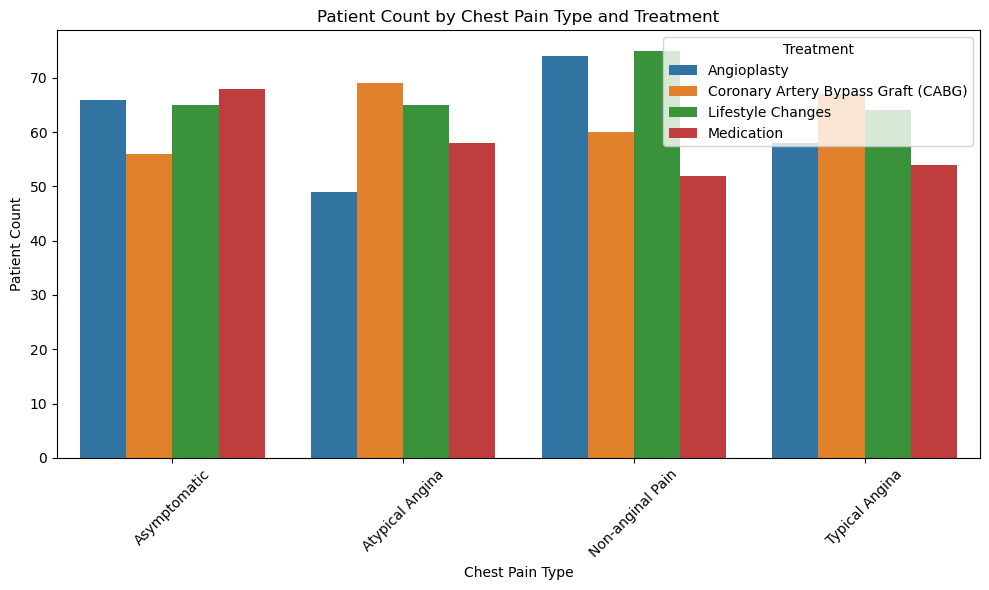

In [149]:
# Plotting the grouped data
plt.figure(figsize=(10, 6))
sns.barplot(grouped_df_cleaned, x='Chest Pain Type', y='Patient_Count', hue='Treatment')
plt.title('Patient Count by Chest Pain Type and Treatment')
plt.xlabel('Chest Pain Type')
plt.ylabel('Patient Count')
plt.xticks(rotation=45)
plt.legend(title='Treatment')
plt.tight_layout()
plt.show()

# Logistic Regression Analysis
I want to know the ratio of the patients who can have 'Heart Attack'or are at high risk with due to age(50 above), diabetic, smoker, have cholesterol and blood pressure.  

In [21]:
!pip install scikit-learn       
from sklearn.model_selection import train_test_split   # to split data to 80%training-20%testing 
from sklearn.linear_model import LogisticRegression    # to predict binary outcome from multivariates  
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report    #for performance report

In [23]:
# Creating indicators(factors) and converting in binary:
df_cleaned['Age_Above_50'] = np.where(df_cleaned['Age'] > 50, 1, 0)
df_cleaned['Smoker'] = np.where(df_cleaned['Smoking Status'] == 'Yes', 1, 0)
df_cleaned['High_Cholesterol'] = np.where(df_cleaned['Cholesterol (mg/dL)'] > 200, 1, 0)
df_cleaned['High_BP'] = np.where(df_cleaned['Blood Pressure (mmHg)'] > 140, 1, 0)
df_cleaned['Has_Diabetes'] = np.where(df_cleaned['Has Diabetes']=='Yes',1,0)

In [24]:
df_cleaned

,Gender,Age,Blood Pressure (mmHg),Cholesterol (mg/dL),Has Diabetes,Smoking Status,Chest Pain Type,Treatment,Age_Above_50,Smoker,High_Cholesterol,High_BP,Has_Diabetes
0,Male,70,181,262,No,Never,Typical Angina,Lifestyle Changes,1,0,1,1,0
1,Female,55,103,253,Yes,Never,Atypical Angina,Angioplasty,1,0,1,0,1
2,Male,42,95,295,Yes,Current,Typical Angina,Angioplasty,0,0,1,0,1
3,Male,84,106,270,No,Never,Atypical Angina,Coronary Artery Bypass Graft (CABG),1,0,1,0,0
4,Male,86,187,296,Yes,Current,Non-anginal Pain,Medication,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Male,42,125,193,Yes,Current,Typical Angina,Angioplasty,0,0,0,0,1
996,Male,80,186,267,Yes,Never,Atypical Angina,Coronary Artery Bypass Graft (CABG),1,0,1,1,1
997,Female,64,108,174,Yes,Current,Non-anginal Pain,Coronary Artery Bypass Graft (CABG),1,0,0,0,1
998,Female,84,123,195,No,Current,Asymptomatic,Lifestyle Changes,1,0,0,0,0


In [25]:
# to count on how many patients are dibateic:
print(df_cleaned['Has_Diabetes'].value_counts())

1    517
0    483
Name: Has_Diabetes, dtype: int64


In [26]:
#to predict Heart_attack with at least 3 indicators/factors should be met 
df_cleaned['Heart_Attack'] = np.where(
    (df_cleaned[['High_Cholesterol', 'High_BP', 'Age_Above_50', 'Smoker', 'Has_Diabetes']].sum(axis=1) >= 3), 1, 0)

In [27]:
print(df_cleaned['Heart_Attack'].value_counts())

0    528
1    472
Name: Heart_Attack, dtype: int64


In [30]:
# Define features(indicators) according to the target(heart attack)
X = df_cleaned[['High_Cholesterol', 'High_BP', 'Age_Above_50', 'Smoker','Has_Diabetes']]
y = df_cleaned['Heart_Attack']  

In [31]:
# Split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [32]:
print(y_train.value_counts())

0    364
1    336
Name: Heart_Attack, dtype: int64


In [33]:
# Fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [34]:
# Make predictions
y_pred = model.predict(X_test)

In [35]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

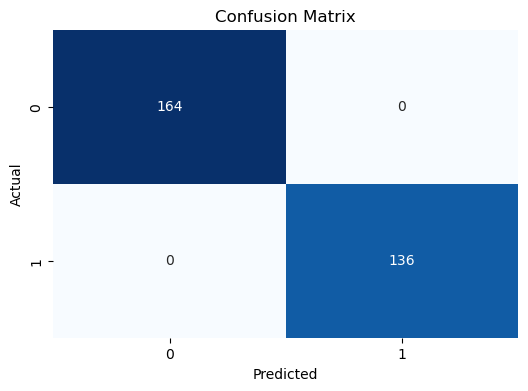

In [36]:
# Visualize the confusion matrix using heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [37]:
# Evaluate the model

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[164   0]
 [  0 136]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       164
           1       1.00      1.00      1.00       136

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [38]:
# To check which factors are affecting at which level to the patients 
# Get the model's coefficients (feature importance)
coefficients = model.coef_[0]
features = ['High_Cholesterol', 'High_BP', 'Age_Above_50', 'Smoker', 'Has_Diabetes']

In [40]:
# Create a DataFrame to display feature importance
import pandas as pd
feature_importance = pd.DataFrame({'Feature': features, 'Importance': coefficients})

In [41]:
# Sort by absolute value of importance
feature_importance['Abs_Importance'] = feature_importance['Importance'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Importance', ascending=False)

In [42]:
# Display the feature importance
print(feature_importance)

            Feature  Importance  Abs_Importance
0  High_Cholesterol    4.942198        4.942198
2      Age_Above_50    4.925959        4.925959
4      Has_Diabetes    4.831676        4.831676
1           High_BP    4.794244        4.794244
3            Smoker    0.000000        0.000000
